In [2]:
# Import das Bibliotecas

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
import plotly.graph_objects as go
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Função para leitura dos arquivos
def ler_arquivo(caminho_arquivo):
    try:
        if caminho_arquivo.endswith('.csv'):
            # Especifique a codificação ao ler o arquivo CSV
            leitor_csv = pd.read_csv(caminho_arquivo, encoding='utf-8')
            return leitor_csv
        elif caminho_arquivo.endswith('.xlsx'):
            conteudo_xlsx = pd.read_excel(caminho_arquivo)
            return conteudo_xlsx
        else:
            with open(caminho_arquivo, 'r') as arquivo:
                conteudo = arquivo.read()
            return conteudo
    except FileNotFoundError:
        return f"O arquivo '{caminho_arquivo}' não foi encontrado."
    except Exception as e:
        return f"Ocorreu um erro ao ler o arquivo: {e}"

# Exemplo de uso para CSV
caminho_csv = './datasets/BankChurners.csv'

In [4]:
df = ler_arquivo(caminho_csv)

In [5]:
# ler as primeiras linhas dataset

df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [6]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [7]:
# Remover as colunas naive_bayes

cols = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

df = df.drop(columns=cols)

In [8]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
# Verificar se ha dados duplicados dataset

print(f'Ha dados duplicados no dataset: \n {df[df.duplicated()]}')

Ha dados duplicados no dataset: 
 Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio]
Index: []

[0 rows x 21 columns]


In [10]:
# Verificando se ha valores ausentes no dataset

table = PrettyTable()

table.field_names = ['Nome_Coluna', 'Tipo_Dados', '%Valores_Missing']

for column in df.columns:
  tipo_dados = str(df[column].dtype)
  valores_missing = 100-df[column].count()/ df.shape[0]*100

  table.add_row([column, tipo_dados, valores_missing])

print(table)

+--------------------------+------------+------------------+
|       Nome_Coluna        | Tipo_Dados | %Valores_Missing |
+--------------------------+------------+------------------+
|        CLIENTNUM         |   int64    |       0.0        |
|      Attrition_Flag      |   object   |       0.0        |
|       Customer_Age       |   int64    |       0.0        |
|          Gender          |   object   |       0.0        |
|     Dependent_count      |   int64    |       0.0        |
|     Education_Level      |   object   |       0.0        |
|      Marital_Status      |   object   |       0.0        |
|     Income_Category      |   object   |       0.0        |
|      Card_Category       |   object   |       0.0        |
|      Months_on_book      |   int64    |       0.0        |
| Total_Relationship_Count |   int64    |       0.0        |
|  Months_Inactive_12_mon  |   int64    |       0.0        |
|  Contacts_Count_12_mon   |   int64    |       0.0        |
|       Credit_Limit    

In [11]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [12]:
# Descritivo do dataset colunas categoricas

for col in df.select_dtypes(include=['object']).columns:
    print(f'\nContagem de valores únicos para {col}:\n{df[col].value_counts()}')


Contagem de valores únicos para Attrition_Flag:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Contagem de valores únicos para Gender:
Gender
F    5358
M    4769
Name: count, dtype: int64

Contagem de valores únicos para Education_Level:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Contagem de valores únicos para Marital_Status:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Contagem de valores únicos para Income_Category:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Contagem de valores únicos para Card_Category:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20


In [13]:
# Attrition_Flag:

# O conjunto de dados tem 8.500 clientes classificados como "Existing Customer" e 1.627 clientes classificados como "Attrited Customer".
# A maioria dos clientes parece ser composta por clientes existentes.

# Gender:

# Existem 5.358 clientes do sexo feminino (F) e 4.769 clientes do sexo masculino (M).
# A distribuição de gênero está relativamente equilibrada no conjunto de dados.

# Education_Level:

# A distribuição de níveis de educação é variada.
# A maioria dos clientes possui um diploma de graduação, seguido por ensino médio e níveis de educação desconhecidos.

# Marital_Status:

# A maioria dos clientes é casada (4.687) ou solteira (3.943).
# Existem alguns clientes com estado civil desconhecido ou divorciado.

# Income_Category:

# A maior parte dos clientes tem uma renda inferior a 40.000.
# A categoria de renda "Unknown" possui 1.112 clientes, indicando falta de informação para esse grupo.
# Há menos clientes nas faixas de renda mais altas (40.000 - 60.000, 80.000 - 120.000, 60.000 - 80.000 e 120.000 +).

# Card_Category:

# A maioria dos clientes possui um cartão da categoria "Blue".
# As categorias de cartão "Silver", "Gold" e "Platinum" têm uma presença significativamente menor.

In [14]:
# Descritivo para as variaveis Numericas

df.describe(include=[float, int])

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

In [15]:
# Cliente (CLIENTNUM):

# Existem 10.127 clientes únicos no conjunto de dados.

# Idade do Cliente (Customer_Age):

# A idade média dos clientes é aproximadamente 46 anos.
# A idade varia de 26 a 73 anos.
# A maioria dos clientes (75%) tem até 52 anos.

# Número de Dependentes (Dependent_count):

# A maioria dos clientes tem entre 1 e 3 dependentes.
# O número máximo de dependentes é 5.


# Os clientes, em média, têm ficado por cerca de 36 meses.
# O tempo varia de 13 a 56 meses.

# Total de Contagens de Relacionamento (Total_Relationship_Count):

# Os clientes têm, em média, cerca de 4 relacionamentos financeiros.
# O número varia de 1 a 6.

# Meses Inativos nos Últimos 12 Meses (Months_Inactive_12_mon):

# Os clientes, em média, estiveram inativos por cerca de 2 meses nos últimos 12 meses.
# Contagens de Contatos nos Últimos 12 Meses (Contacts_Count_12_mon):

# Os clientes, em média, foram contatados cerca de 2 a 3 vezes nos últimos 12 meses.

# Limite de Crédito (Credit_Limit):

# O limite de crédito médio é de aproximadamente $8.631.
# O limite de crédito varia de $1.438 a $34.516.

# Saldo Total Rotativo (Total_Revolving_Bal):

# O saldo rotativo médio é de aproximadamente $1.162.
# O saldo varia de $0 a $2.517.

# Média Aberta para Comprar (Avg_Open_To_Buy):

# A média aberta para comprar é de aproximadamente $7.469.
# Varia de $3 a $34.516.

# Mudança Total do Montante Q4 para Q1 (Total_Amt_Chng_Q4_Q1):

# A mudança média no montante é de aproximadamente 0,76.
# Varia de 0 a 3,397.
# Total de Transações (Total_Trans_Amt):

# O valor total médio de transações é de aproximadamente $4.404.
# Varia de $510 a $18.484.

# Total de Transações Contadas (Total_Trans_Ct):

# A contagem total média de transações é de aproximadamente 65.
# Varia de 10 a 139.

# Mudança Total na Contagem Q4 para Q1 (Total_Ct_Chng_Q4_Q1):

# A mudança média na contagem é de aproximadamente 0,71.
# Varia de 0 a 3,714.

#Taxa Média de Utilização (Avg_Utilization_Ratio):

# A taxa média de utilização é de aproximadamente 0,27.
# Varia de 0 a 0,999.

In [16]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

#  Perguntas de negocios para obter insights do dataset

## Retenção de Clientes

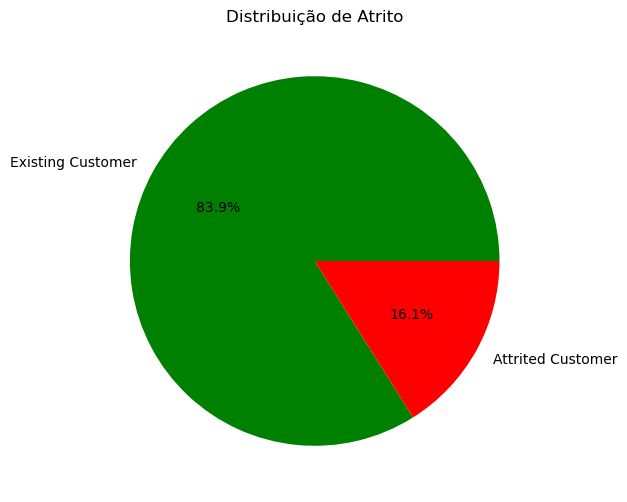

In [17]:
# Qual é a taxa de atrito de clientes ("Attrited Customer") em relação ao total de clientes existentes?

# Contagem de clientes por atrito
attrition_counts = df['Attrition_Flag'].value_counts()

# Criar um gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('Distribuição de Atrito')
plt.show()

In [18]:
import plotly.graph_objects as go

# Contagem de clientes por atrito
attrition_counts = df['Attrition_Flag'].value_counts()

# Criar gráfico de indicador
fig = go.Figure(go.Indicator(
    mode="number",
    value=int(attrition_counts['Existing Customer']),  # Valor da fatia verde
    domain={'x': [0, 0.3], 'y': [1, 1]},
    title={'text': "Existing Customer"},
    number={'valueformat': 'd'},  # Formatar para notação com vírgula
    gauge={'axis': {'range': [None, len(df)], 'tickvals': [0, len(df)], 'ticktext': ["Attrited", "Existing"]},
           'bar': {'color': "green"}},
))

# Adicionar a segunda fatia (Attrited Customer)
fig.add_trace(go.Indicator(
    mode="number",
    value=attrition_counts['Attrited Customer'],  # Valor da fatia vermelha
    domain={'x': [0.5, 1], 'y': [0, 1]},
    title={'text': "Attrited Customer"},
    gauge={'axis': {'range': [0, len(df)], 'tickvals': [0, len(df)], 'ticktext': ["Attrited", "Existing"]},
           'bar': {'color': "red"}},
))

# Atualizar layout
fig.update_layout(
    title="Distribuição de Atrito",
    title_y=0.9,  # Definir a posição vertical do título
    title_x=0.45,  # Definir a posição horizontal do título
    grid={'rows': 1, 'columns': 2, 'pattern': "independent"},
)

# Exibir o gráfico
fig.show()


In [19]:
df1 = df.copy()

# Converter a coluna 'Attrition_Flag' para valores numéricos (1 para 'Attrited Customer' e 0 para 'Existing Customer')
df1['Attrition_Flag_Num'] = df1['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})


# Selecionar apenas colunas numéricas
df_numeric = df1.select_dtypes(include=['number'])

# Calcular a correlação com a variável dummy de Attrition_Flag
correlation_with_attrition = df_numeric.corr()['Attrition_Flag_Num'].sort_values(ascending=False)

# Exibir as correlações com 'Attrition_Flag'
print("Correlações com 'Attrition_Flag_Existing Customer':")
print(correlation_with_attrition)

Correlações com 'Attrition_Flag_Existing Customer':
Attrition_Flag_Num          1.000000
Contacts_Count_12_mon       0.204491
Months_Inactive_12_mon      0.152449
Dependent_count             0.018991
Customer_Age                0.018203
Months_on_book              0.013687
Avg_Open_To_Buy            -0.000285
Credit_Limit               -0.023873
CLIENTNUM                  -0.046430
Total_Amt_Chng_Q4_Q1       -0.131063
Total_Relationship_Count   -0.150005
Total_Trans_Amt            -0.168598
Avg_Utilization_Ratio      -0.178410
Total_Revolving_Bal        -0.263053
Total_Ct_Chng_Q4_Q1        -0.290054
Total_Trans_Ct             -0.371403
Name: Attrition_Flag_Num, dtype: float64


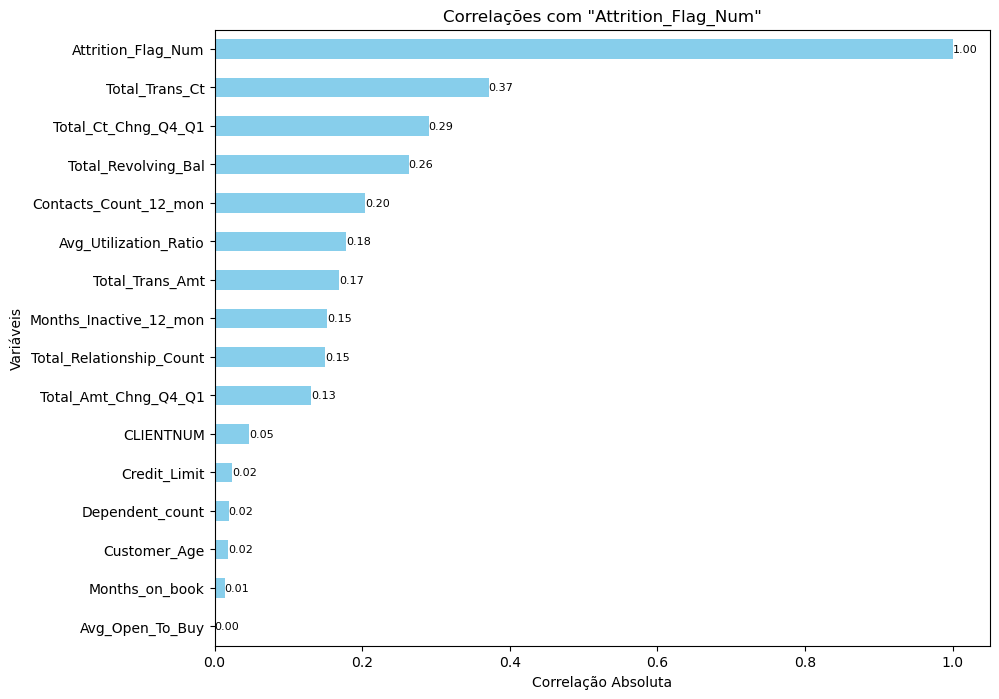

In [20]:
# Ordenar por valor absoluto
correlation_result = correlation_with_attrition.abs().sort_values()

# Plotar o gráfico de barras horizontais
plt.figure(figsize=(10, 8))
bars = correlation_result.plot(kind='barh', color='skyblue')
plt.title('Correlações com "Attrition_Flag_Num"')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Variáveis')

# Adicionar rótulos nas barras
for bar in bars.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=8, color='black')

plt.show()
plt.show()

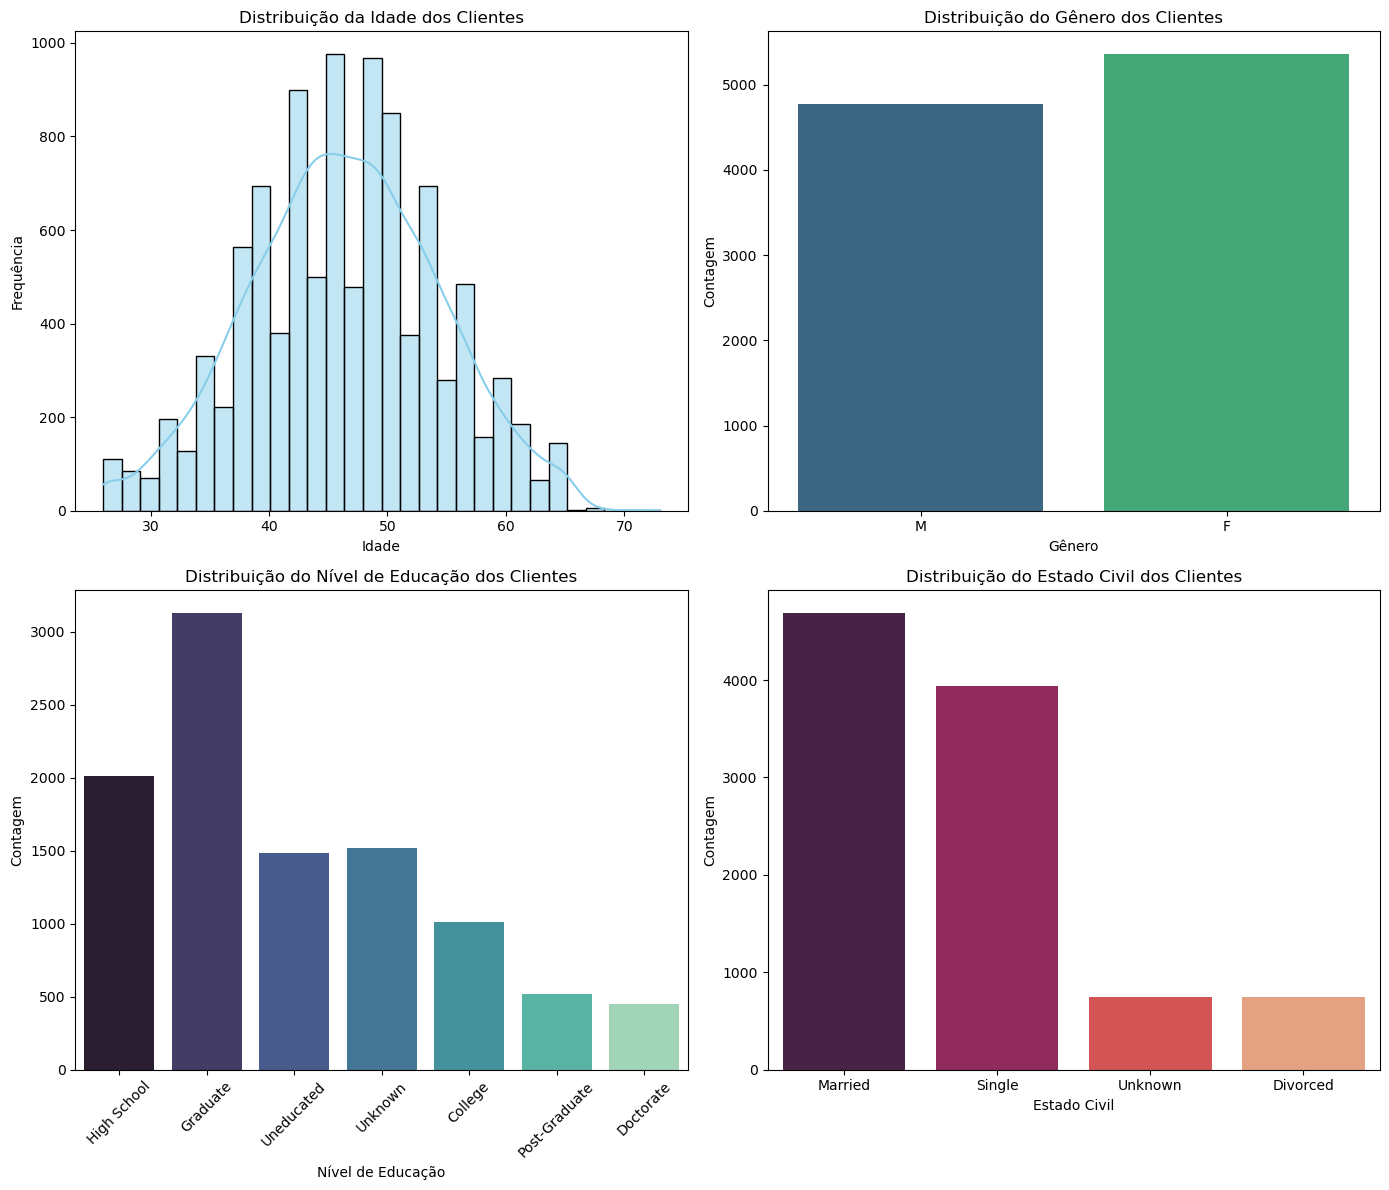

In [21]:
# Como as variáveis demográficas, como idade, gênero, educação e estado civil

# Configurar o layout com duas colunas e duas linhas
plt.figure(figsize=(14, 12))

# Subplot 1: Distribuição da Idade
plt.subplot(2, 2, 1)
sns.histplot(df['Customer_Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição da Idade dos Clientes')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Subplot 2: Distribuição do Gênero
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribuição do Gênero dos Clientes')
plt.xlabel('Gênero')
plt.ylabel('Contagem')

# Subplot 3: Distribuição da Educação
plt.subplot(2, 2, 3)
sns.countplot(x='Education_Level', data=df, palette='mako')
plt.title('Distribuição do Nível de Educação dos Clientes')
plt.xlabel('Nível de Educação')
plt.ylabel('Contagem')
plt.xticks(rotation=45)

# Subplot 4: Distribuição do Estado Civil
plt.subplot(2, 2, 4)
sns.countplot(x='Marital_Status', data=df, palette='rocket')
plt.title('Distribuição do Estado Civil dos Clientes')
plt.xlabel('Estado Civil')
plt.ylabel('Contagem')

# Ajustar o layout para evitar sobreposições
plt.tight_layout()

# Mostrar os gráficos
plt.show()

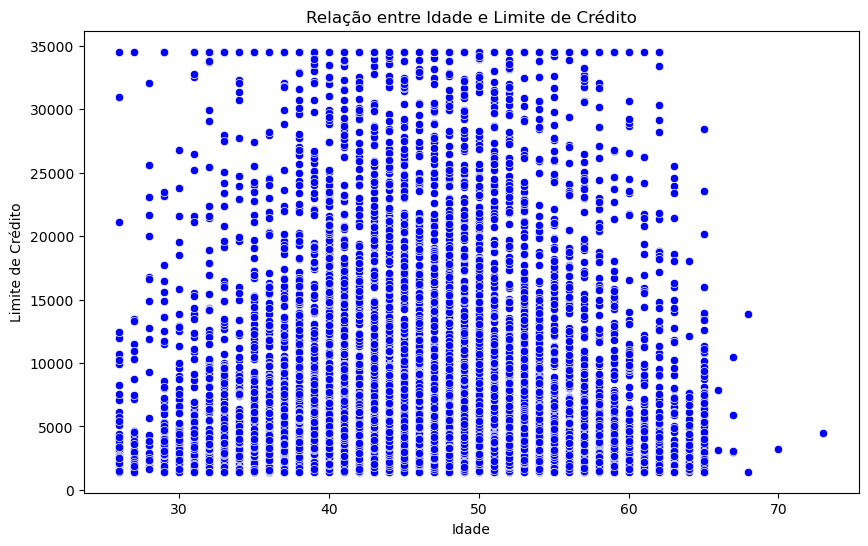

Correlação entre Idade e Limite de Crédito: 0.00


In [22]:
# Gráfico de dispersão entre idade e Credit_Limit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer_Age', y='Credit_Limit', data=df, color='blue')
plt.title('Relação entre Idade e Limite de Crédito')
plt.xlabel('Idade')
plt.ylabel('Limite de Crédito')
plt.show()

# Calcular a correlação entre idade e Credit_Limit
correlation_age_credit_limit = df['Customer_Age'].corr(df['Credit_Limit'])
print(f"Correlação entre Idade e Limite de Crédito: {correlation_age_credit_limit:.2f}")

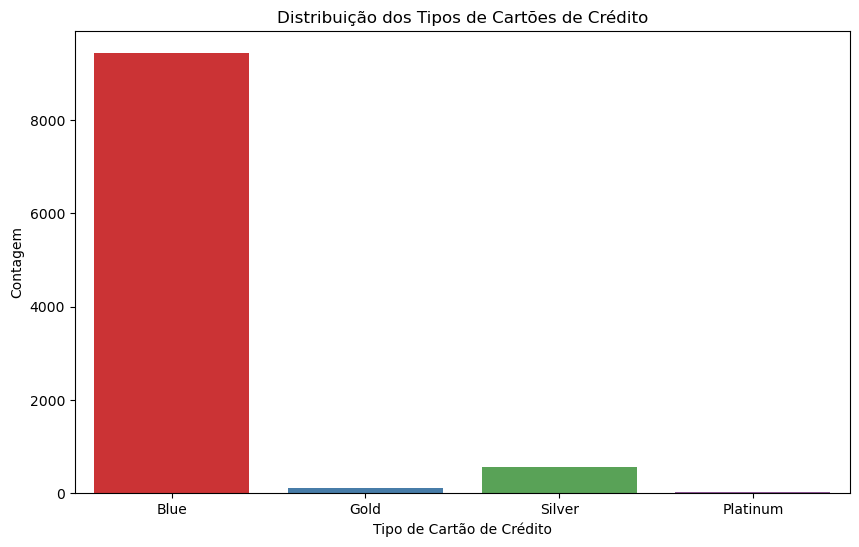

In [23]:
# Qual é a distribuição dos diferentes tipos de cartões de crédito ("Card_Category") entre os clientes?

# Gráfico de barras para a distribuição dos tipos de cartões de crédito
plt.figure(figsize=(10, 6))
sns.countplot(x='Card_Category', data=df, palette='Set1')
plt.title('Distribuição dos Tipos de Cartões de Crédito')
plt.xlabel('Tipo de Cartão de Crédito')
plt.ylabel('Contagem')
plt.show()

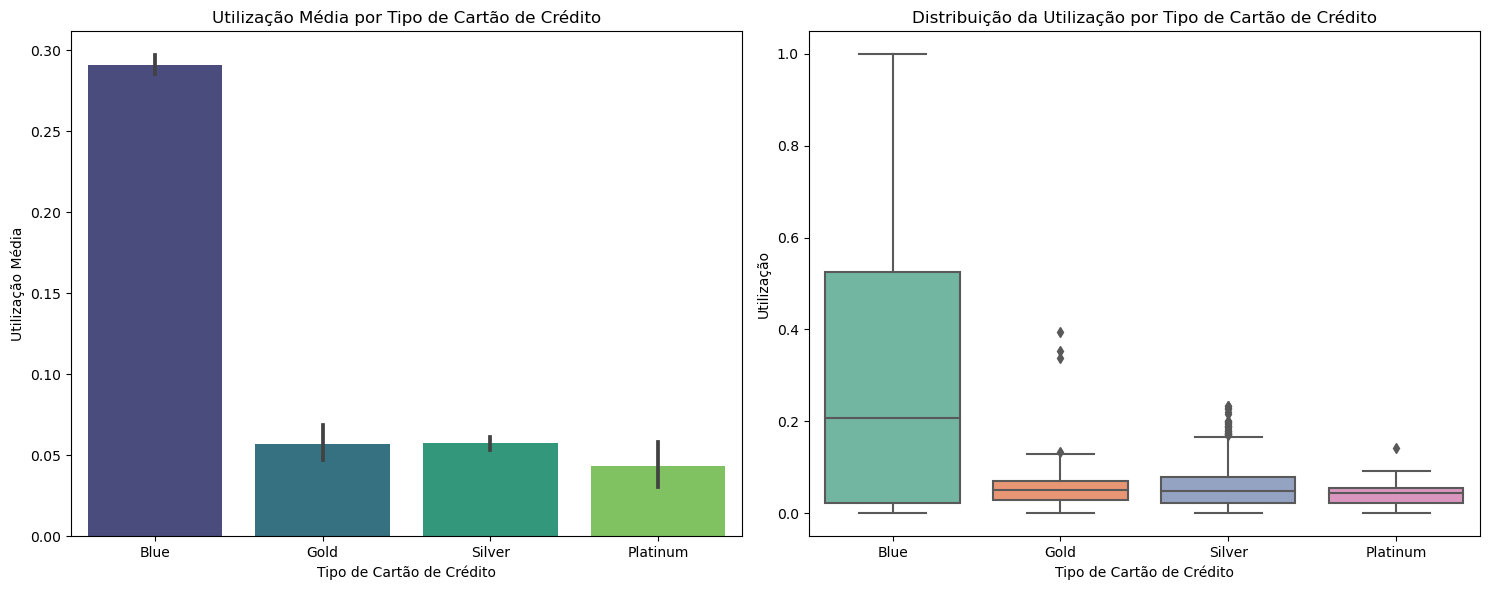

In [24]:
# Como a utilização média varia entre os diferentes tipos de cartões de crédito?

# Configurar o layout com subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Gráfico de barras para a utilização média por tipo de cartão de crédito
sns.barplot(x='Card_Category', y='Avg_Utilization_Ratio', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Utilização Média por Tipo de Cartão de Crédito')
axes[0].set_xlabel('Tipo de Cartão de Crédito')
axes[0].set_ylabel('Utilização Média')

# Gráfico de caixas para a utilização por tipo de cartão de crédito
sns.boxplot(x='Card_Category', y='Avg_Utilization_Ratio', data=df, palette='Set2', ax=axes[1])
axes[1].set_title('Distribuição da Utilização por Tipo de Cartão de Crédito')
axes[1].set_xlabel('Tipo de Cartão de Crédito')
axes[1].set_ylabel('Utilização')

# Ajustar o layout para evitar sobreposições
plt.tight_layout()

# Mostrar os gráficos
plt.show()

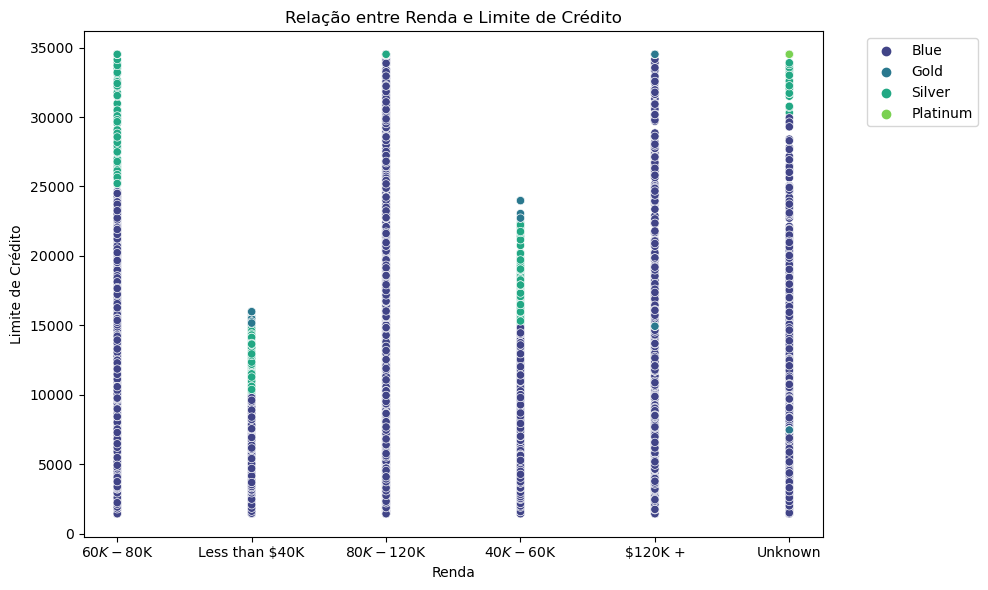

In [25]:
# Como a renda dos clientes está relacionada aos limites de crédito concedidos?

#Gráfico de dispersão entre renda e limite de crédito
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Income_Category', y='Credit_Limit', data=df, hue='Card_Category', palette='viridis')
scatter.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Relação entre Renda e Limite de Crédito')
plt.xlabel('Renda')
plt.ylabel('Limite de Crédito')
plt.tight_layout()
plt.show()

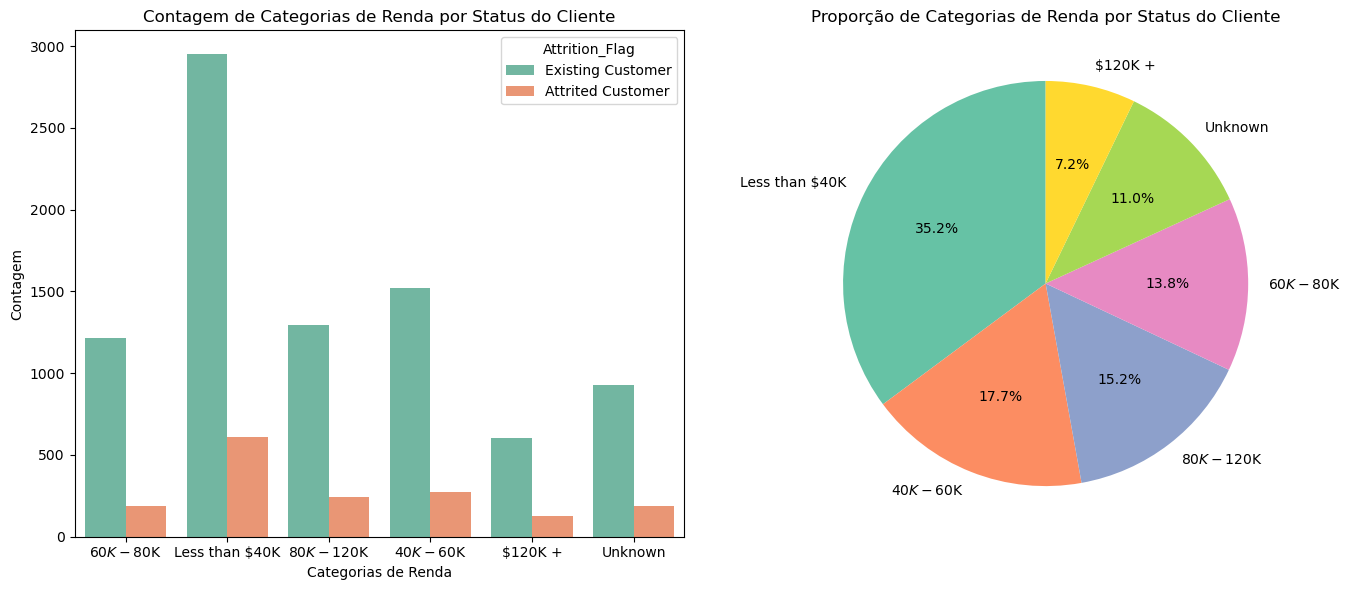

In [26]:
# Qual é a distribuição de renda entre os clientes existentes e aqueles que encerraram o relacionamento?

# Criação de subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras para a contagem de categorias de renda
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Contagem de Categorias de Renda por Status do Cliente')
axes[0].set_xlabel('Categorias de Renda')
axes[0].set_ylabel('Contagem')

# Gráfico de pizza para a proporção de categorias de renda por status do cliente
income_counts = df['Income_Category'].value_counts()
axes[1].pie(income_counts, labels=income_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[1].set_title('Proporção de Categorias de Renda por Status do Cliente')

plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

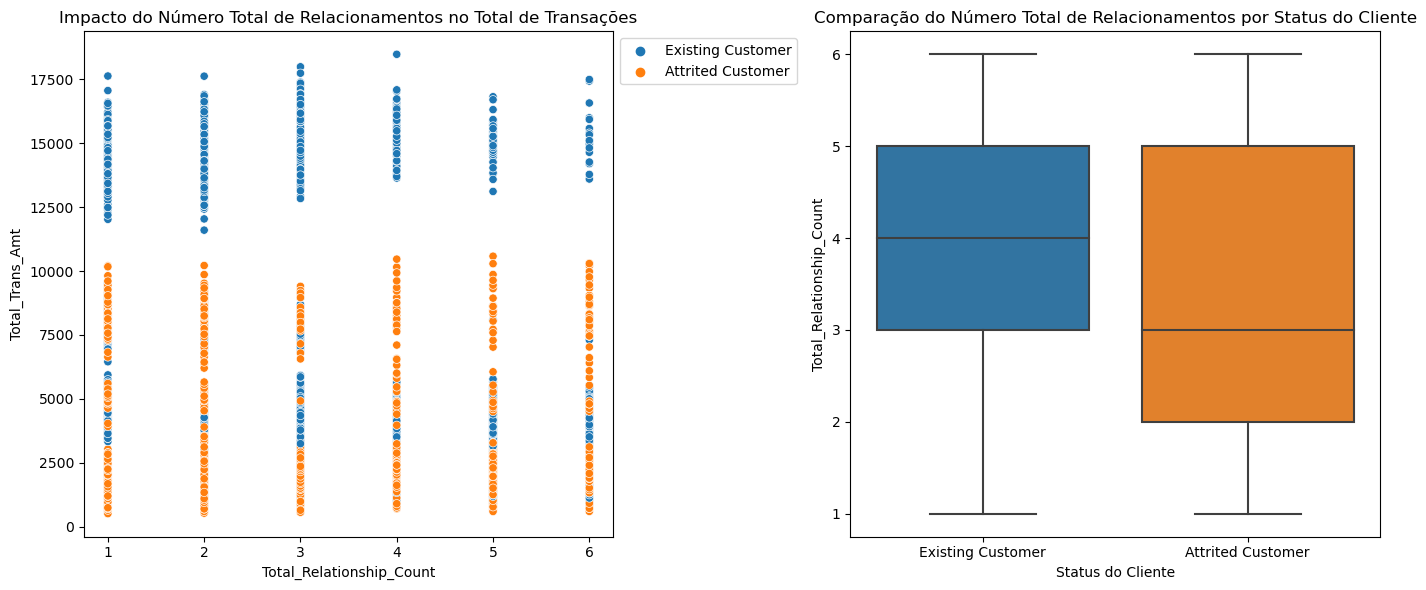

In [27]:
# Como o número total de relacionamentos financeiros ("Total_Relationship_Count") impacta outros aspectos do comportamento do cliente?


# Criação de subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de dispersão com regressão linear
scatter_plot = sns.scatterplot(x='Total_Relationship_Count', y='Total_Trans_Amt', data=df, hue='Attrition_Flag', ax=axes[0])
axes[0].set_title('Impacto do Número Total de Relacionamentos no Total de Transações')
axes[0].set_xlabel('Total_Relationship_Count')
axes[0].set_ylabel('Total_Trans_Amt')

# Posiciona a legenda fora do gráfico de dispersão
scatter_plot.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Boxplot para comparar o número total de relacionamentos
sns.boxplot(x='Attrition_Flag', y='Total_Relationship_Count', data=df, ax=axes[1])
axes[1].set_title('Comparação do Número Total de Relacionamentos por Status do Cliente')
axes[1].set_xlabel('Status do Cliente')
axes[1].set_ylabel('Total_Relationship_Count')


plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

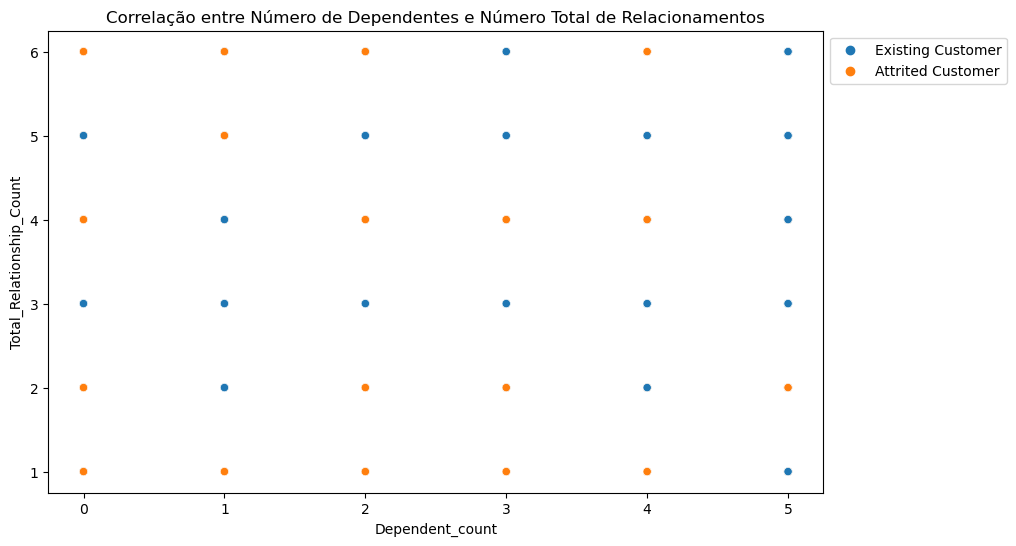

In [28]:
# Existe uma correlação entre o número de dependentes e o número total de relacionamentos financeiros?

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='Dependent_count', y='Total_Relationship_Count', data=df, hue='Attrition_Flag')
plt.title('Correlação entre Número de Dependentes e Número Total de Relacionamentos')
plt.xlabel('Dependent_count')
plt.ylabel('Total_Relationship_Count')
plt.legend(title='Attrition_Flag')
scatter.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

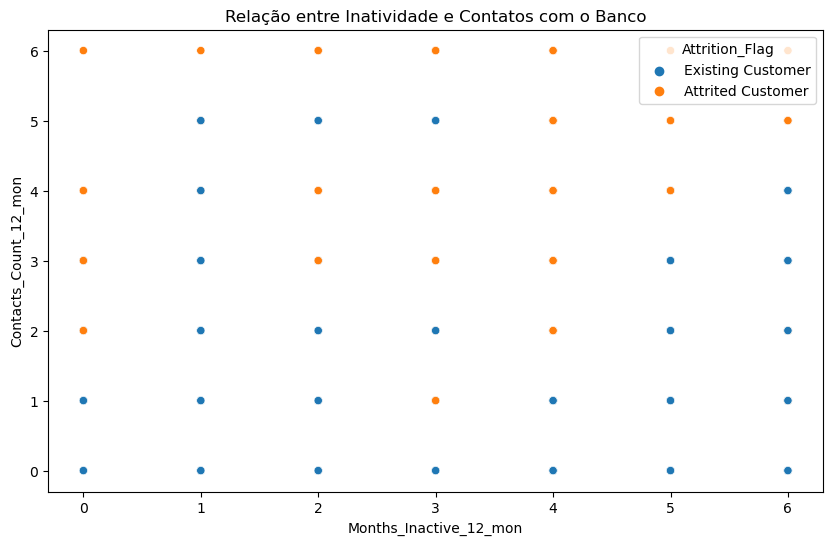

In [29]:
# Como a inatividade dos clientes nos últimos 12 meses está relacionada à quantidade de contatos realizados pelo banco?

# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Months_Inactive_12_mon', y='Contacts_Count_12_mon', data=df, hue='Attrition_Flag')
plt.title('Relação entre Inatividade e Contatos com o Banco')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Contacts_Count_12_mon')
plt.legend(title='Attrition_Flag')
plt.show()

In [30]:
# Quais são os fatores associados à inatividade dos clientes?

# Estatísticas descritivas
inactive_stats = df[df['Attrition_Flag'] == 'Attrited Customer']['Months_Inactive_12_mon'].describe()
active_stats = df[df['Attrition_Flag'] == 'Existing Customer']['Months_Inactive_12_mon'].describe()

print("Estatísticas para Clientes Inativos:")
print(inactive_stats)

print("\nEstatísticas para Clientes Ativos:")
print(active_stats)

Estatísticas para Clientes Inativos:
count    1627.000000
mean        2.693301
std         0.899623
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: Months_Inactive_12_mon, dtype: float64

Estatísticas para Clientes Ativos:
count    8500.000000
mean        2.273765
std         1.016741
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: Months_Inactive_12_mon, dtype: float64


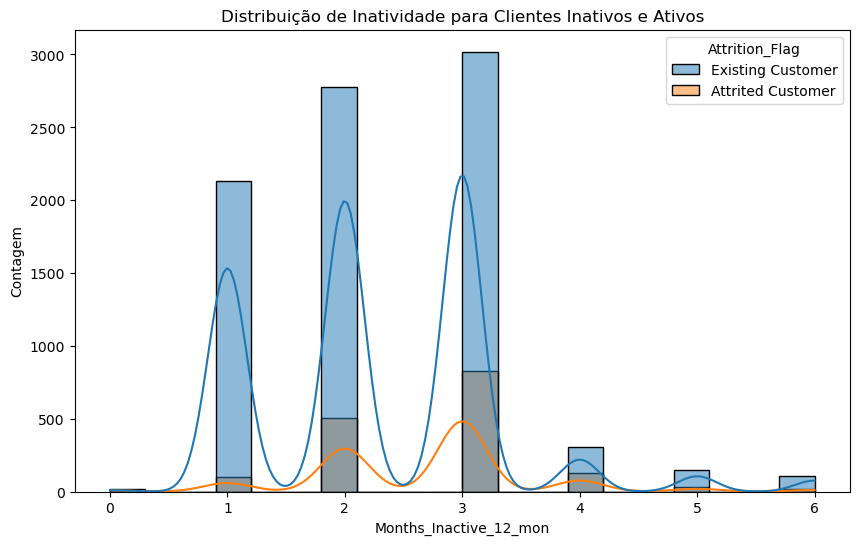

In [31]:
# Histograma
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Months_Inactive_12_mon', hue='Attrition_Flag', bins=20, kde=True)
plt.title('Distribuição de Inatividade para Clientes Inativos e Ativos')
plt.xlabel('Months_Inactive_12_mon')
plt.ylabel('Contagem')
plt.show()

In [32]:
# Teste estatistico

from scipy.stats import ttest_ind

# Teste t de Student
statistic, p_value = ttest_ind(df[df['Attrition_Flag'] == 'Attrited Customer']['Months_Inactive_12_mon'],
                                df[df['Attrition_Flag'] == 'Existing Customer']['Months_Inactive_12_mon'])

print("Teste t de Student:")
print(f"Estatística: {statistic}")
print(f"Valor p: {p_value}")

Teste t de Student:
Estatística: 15.52128784291336
Valor p: 1.0326639995929033e-53


#### O resultado do teste t de Student indica que há uma diferença significativa nas médias da variável "Months_Inactive_12_mon" entre clientes inativos ("Attrited Customer") e clientes ativos ("Existing Customer"). O valor p extremamente baixo (1.03e-53) sugere forte evidência estatística contra a hipótese nula de que as médias são iguais.

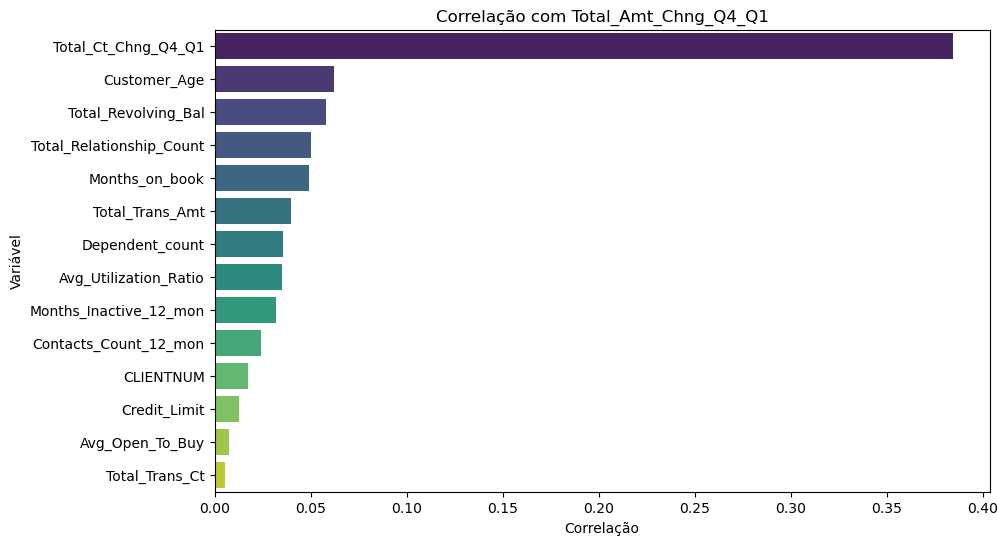

In [33]:
# Quais fatores estão associados a mudanças significativas nos montantes e contagens de transações de um trimestre para o outro?

df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
correlation_matrix = df_numeric.corr()

# Exemplo de correlação entre 'Total_Amt_Chng_Q4_Q1' e outras variáveis
correlation_amt_changes = correlation_matrix['Total_Amt_Chng_Q4_Q1'].drop('Total_Amt_Chng_Q4_Q1')


# Ordena por valor absoluto para destacar as correlações mais fortes
correlation_amt_changes = correlation_amt_changes.abs().sort_values(ascending=False)

# Cria um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_amt_changes.values, y=correlation_amt_changes.index, palette='viridis')
plt.title('Correlação com Total_Amt_Chng_Q4_Q1')
plt.xlabel('Correlação')
plt.ylabel('Variável')
plt.show()


In [34]:
import statsmodels.api as sm

X = df[['Customer_Age', 'Total_Revolving_Bal']]
X = sm.add_constant(X)
y = df['Total_Amt_Chng_Q4_Q1']

model = sm.OLS(y, X).fit()
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     Total_Amt_Chng_Q4_Q1   R-squared:                       0.007
Model:                              OLS   Adj. R-squared:                  0.007
Method:                   Least Squares   F-statistic:                     37.44
Date:                  Mon, 01 Jan 2024   Prob (F-statistic):           6.32e-17
Time:                          18:38:10   Log-Likelihood:                 1038.4
No. Observations:                 10127   AIC:                            -2071.
Df Residuals:                     10124   BIC:                            -2049.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const         

Taxa de Atrito por Gender:
Gender
F    0.173572
M    0.146152
Name: Attrition_Flag_Num, dtype: float64


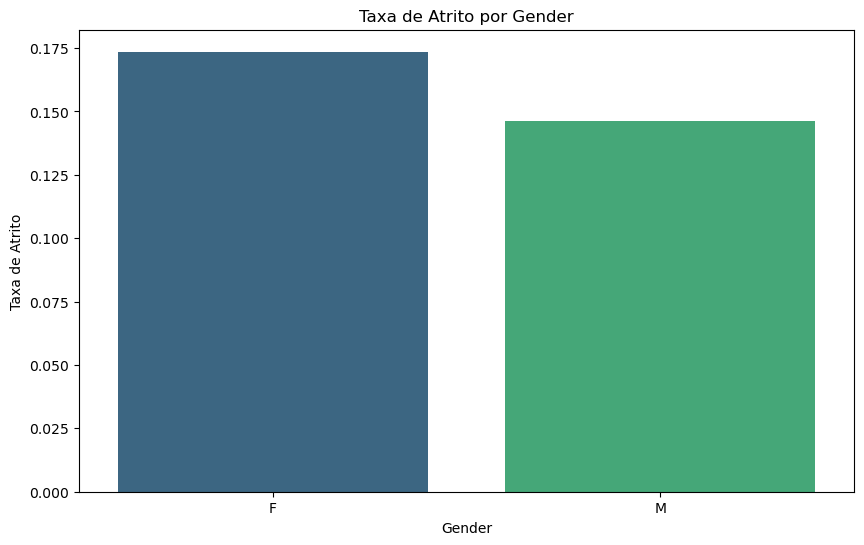

Taxa de Atrito por Education_Level:
Education_Level
College          0.152024
Doctorate        0.210643
Graduate         0.155691
High School      0.152012
Post-Graduate    0.178295
Uneducated       0.159381
Unknown          0.168532
Name: Attrition_Flag_Num, dtype: float64


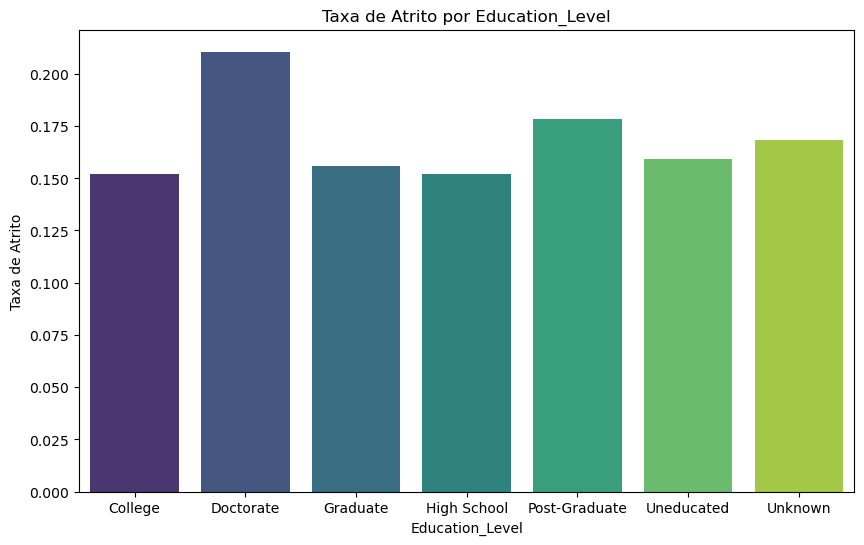

Taxa de Atrito por Marital_Status:
Marital_Status
Divorced    0.161765
Married     0.151269
Single      0.169414
Unknown     0.172230
Name: Attrition_Flag_Num, dtype: float64


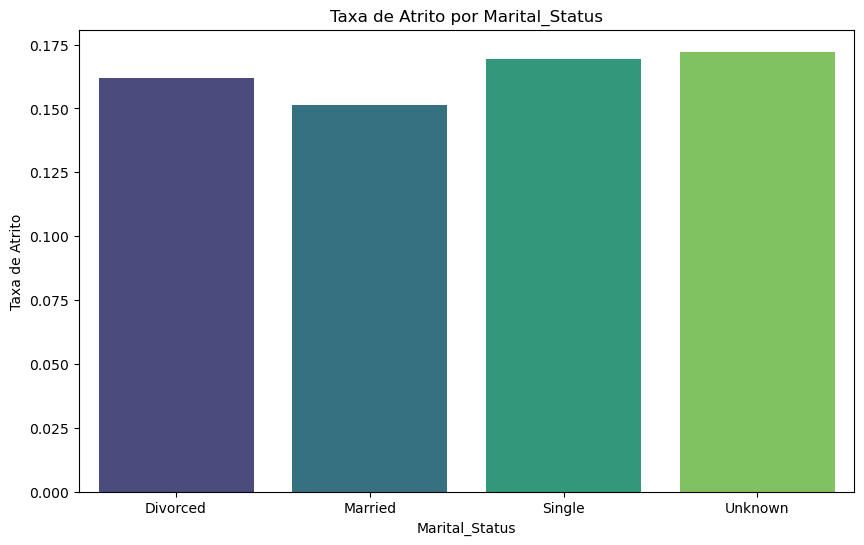

In [35]:
# Calcule a taxa de atrito para diferentes categorias, como gênero, educação, estado civil

df_copy = df.copy()

# Mapear a coluna 'Attrition_Flag' para valores numéricos (0 para 'Existing Customer' e 1 para 'Attrited Customer')
df_copy['Attrition_Flag_Num'] = df_copy['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Função para calcular taxa de atrito por categoria e visualizar

def calculate_and_plot_attrition_rate(column_name):
    attrition_rate = df_copy.groupby(column_name)['Attrition_Flag_Num'].mean()
    print(f"Taxa de Atrito por {column_name}:\n{attrition_rate}")

    plt.figure(figsize=(10, 6))
    sns.barplot(x=attrition_rate.index, y=attrition_rate.values, palette='viridis')
    plt.title(f'Taxa de Atrito por {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Taxa de Atrito')
    plt.show()

# Calcula e plota a taxa de atrito por gênero
calculate_and_plot_attrition_rate('Gender')

# Calcula e plota a taxa de atrito por educação
calculate_and_plot_attrition_rate('Education_Level')

# Calcula e plota a taxa de atrito por estado civil
calculate_and_plot_attrition_rate('Marital_Status')

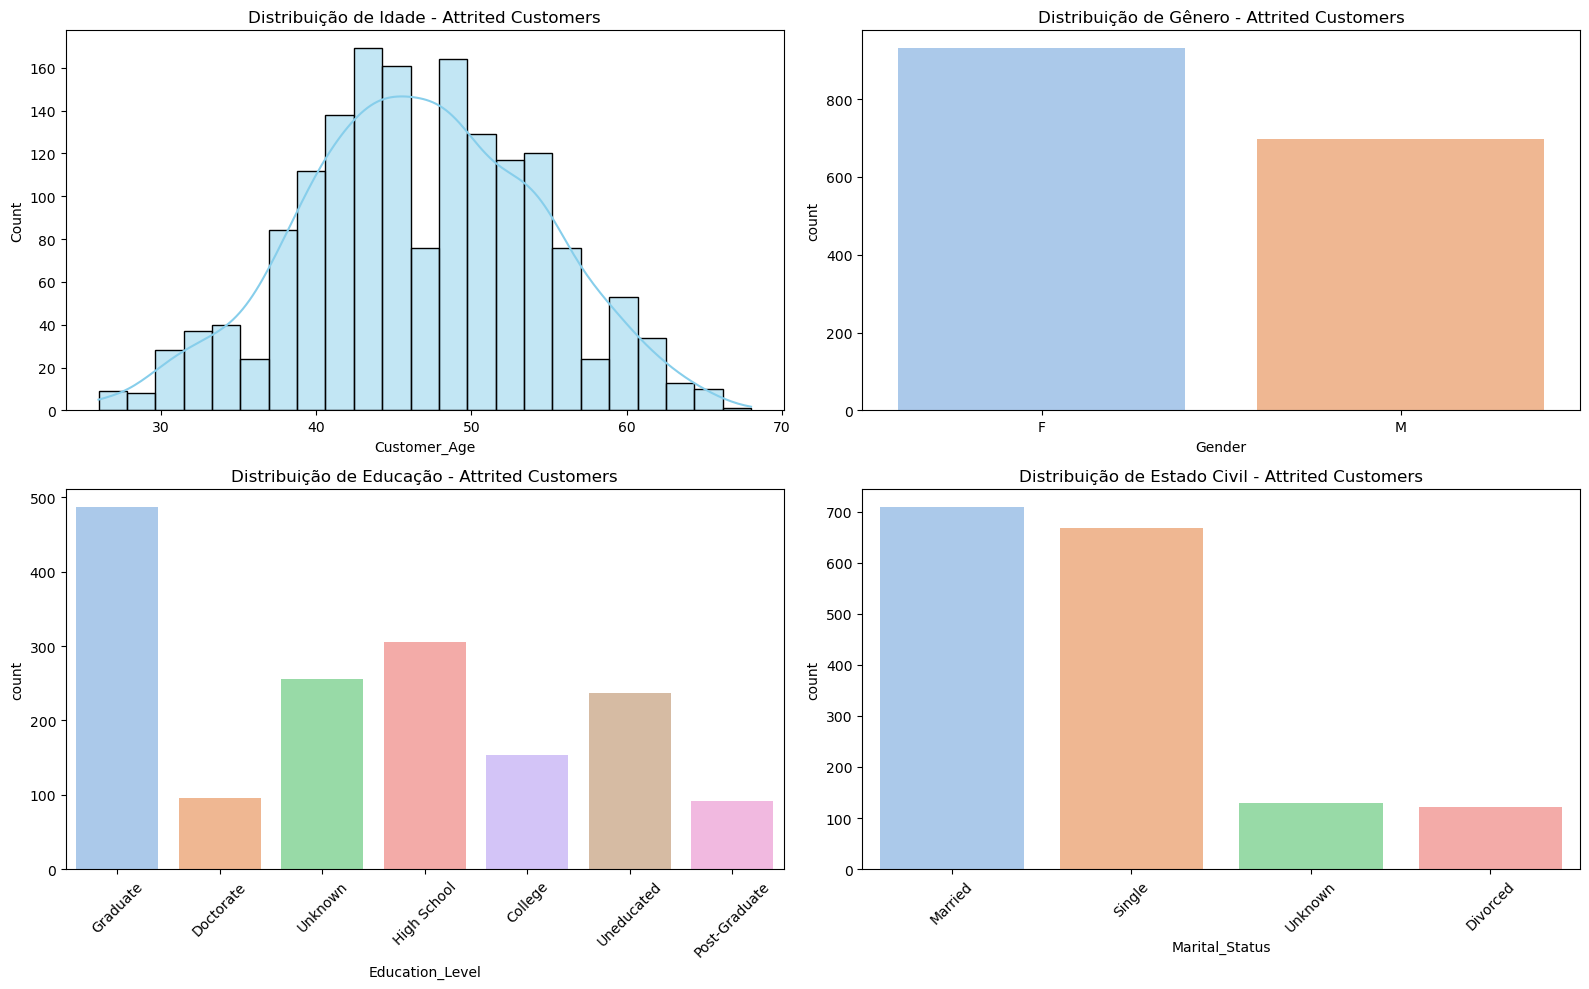

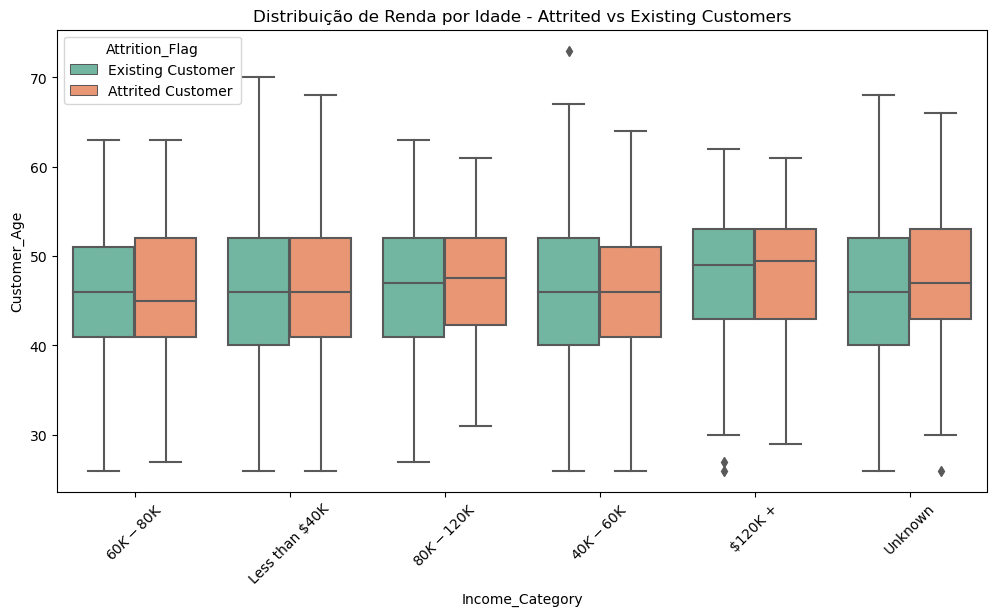

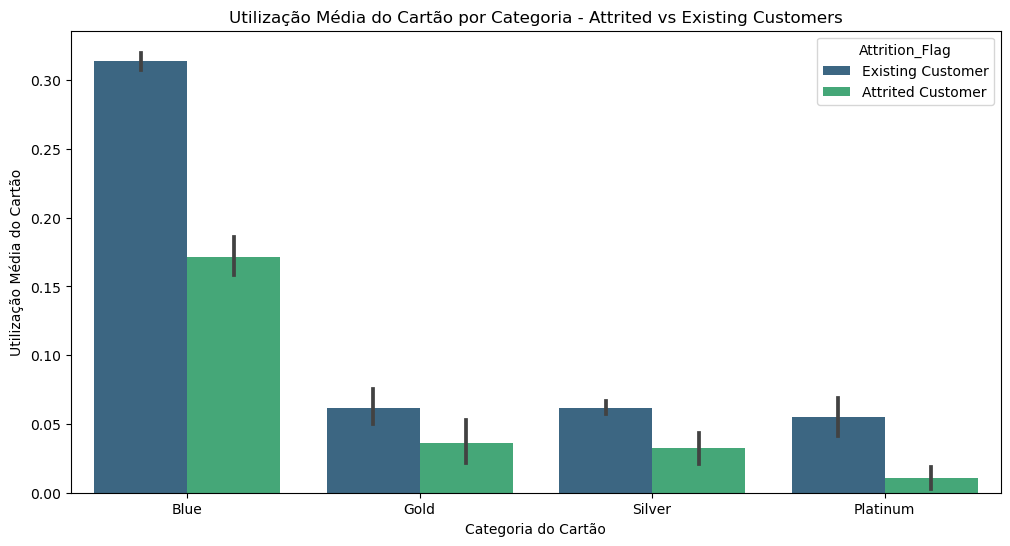

In [36]:
# Analise o perfil demográfico dos clientes que encerraram o relacionamento (attrited customers)

plt.figure(figsize=(16, 10))

# Subplot 1: Distribuição de Idade
plt.subplot(2, 2, 1)
sns.histplot(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'], kde=True, color='skyblue')
plt.title('Distribuição de Idade - Attrited Customers')

# Subplot 2: Distribuição de Gênero
plt.subplot(2, 2, 2)
sns.countplot(x='Gender', data=df[df['Attrition_Flag'] == 'Attrited Customer'], palette='pastel')
plt.title('Distribuição de Gênero - Attrited Customers')

# Subplot 3: Distribuição de Educação
plt.subplot(2, 2, 3)
sns.countplot(x='Education_Level', data=df[df['Attrition_Flag'] == 'Attrited Customer'], palette='pastel')
plt.title('Distribuição de Educação - Attrited Customers')
plt.xticks(rotation=45)

# Subplot 4: Distribuição de Estado Civil
plt.subplot(2, 2, 4)
sns.countplot(x='Marital_Status', data=df[df['Attrition_Flag'] == 'Attrited Customer'], palette='pastel')
plt.title('Distribuição de Estado Civil - Attrited Customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Análise de Renda
plt.figure(figsize=(12, 6))
sns.boxplot(x='Income_Category', y='Customer_Age', hue='Attrition_Flag', data=df, palette='Set2')
plt.title('Distribuição de Renda por Idade - Attrited vs Existing Customers')
plt.xticks(rotation=45)
plt.show()

# 3. Análise de Utilização do Cartão
plt.figure(figsize=(12, 6))
sns.barplot(x='Card_Category', y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df, palette='viridis')
plt.title('Utilização Média do Cartão por Categoria - Attrited vs Existing Customers')
plt.xlabel('Categoria do Cartão')
plt.ylabel('Utilização Média do Cartão')
plt.show()

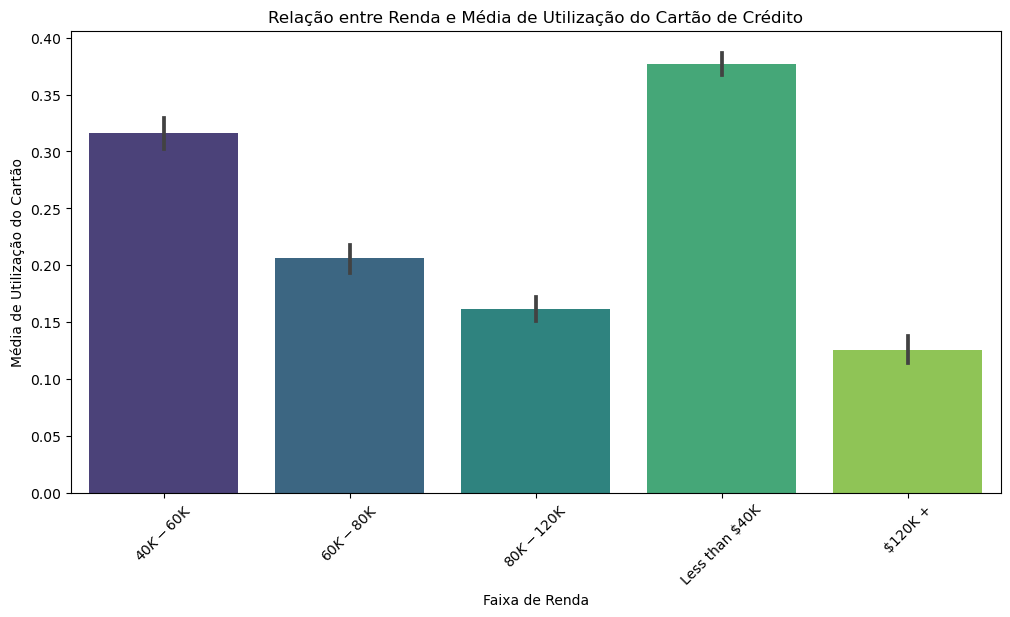

In [37]:
# Explorar  como a renda dos clientes está relacionada à utilização do cartão de crédito.

df_copy = df.copy()

# Criar uma nova variável 'Income_Category_Num' para ordenar as faixas de renda
income_order = ['$40K - $60K', '$60K - $80K', '$80K - $120K', 'Less than $40K', '$120K +']
df_copy['Income_Category_Num'] = pd.Categorical(df_copy['Income_Category'], categories=income_order, ordered=True)

# Visualizar a relação entre renda e média de utilização do cartão
plt.figure(figsize=(12, 6))
sns.barplot(x='Income_Category_Num', y='Avg_Utilization_Ratio', data=df_copy, palette='viridis')
plt.title('Relação entre Renda e Média de Utilização do Cartão de Crédito')
plt.xlabel('Faixa de Renda')
plt.ylabel('Média de Utilização do Cartão')
plt.xticks(rotation=45)
plt.show()

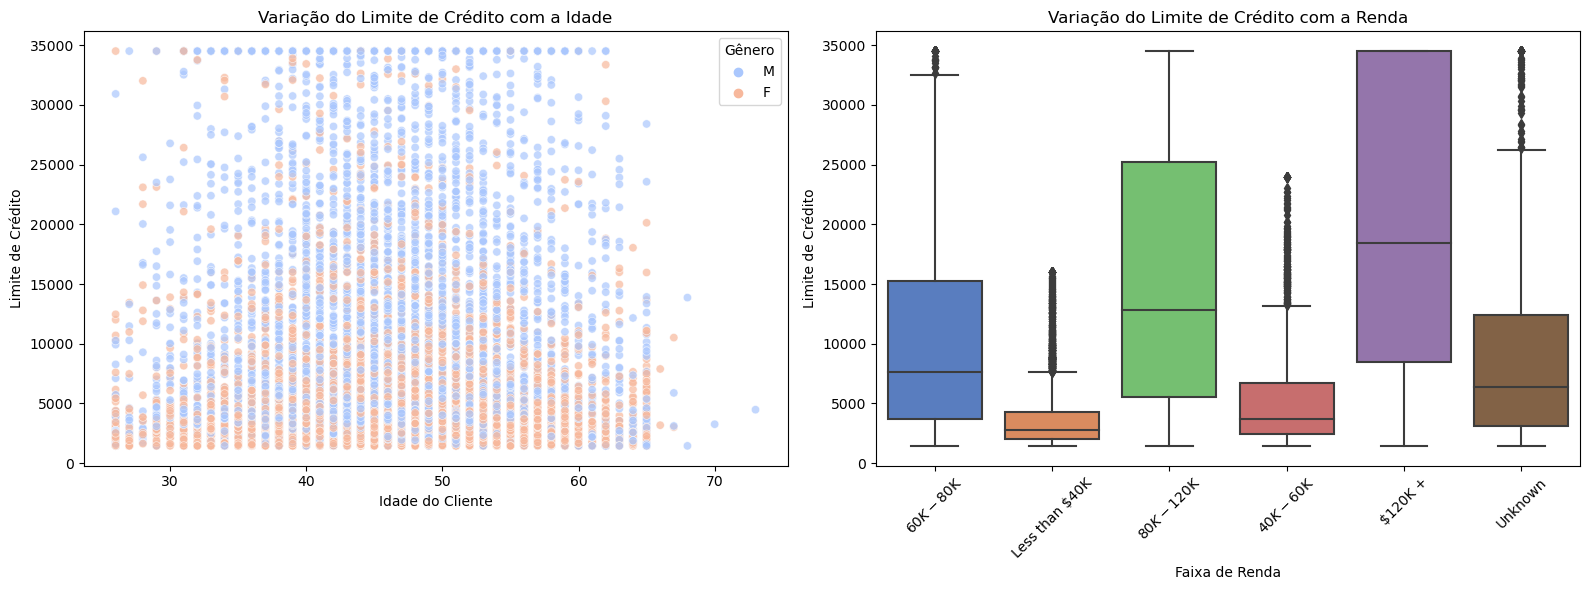

In [38]:
# limite de crédito concedido varia com a idade, gênero ou renda do cliente.

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.scatterplot(x='Customer_Age', y='Credit_Limit', data=df, hue='Gender', palette='coolwarm', alpha=0.7, ax=axes[0])
axes[0].set_title('Variação do Limite de Crédito com a Idade')
axes[0].set_xlabel('Idade do Cliente')
axes[0].set_ylabel('Limite de Crédito')
axes[0].legend(title='Gênero')

sns.boxplot(x='Income_Category', y='Credit_Limit', data=df, palette='muted', ax=axes[1])
axes[1].set_title('Variação do Limite de Crédito com a Renda')
axes[1].set_xlabel('Faixa de Renda')
axes[1].set_ylabel('Limite de Crédito')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

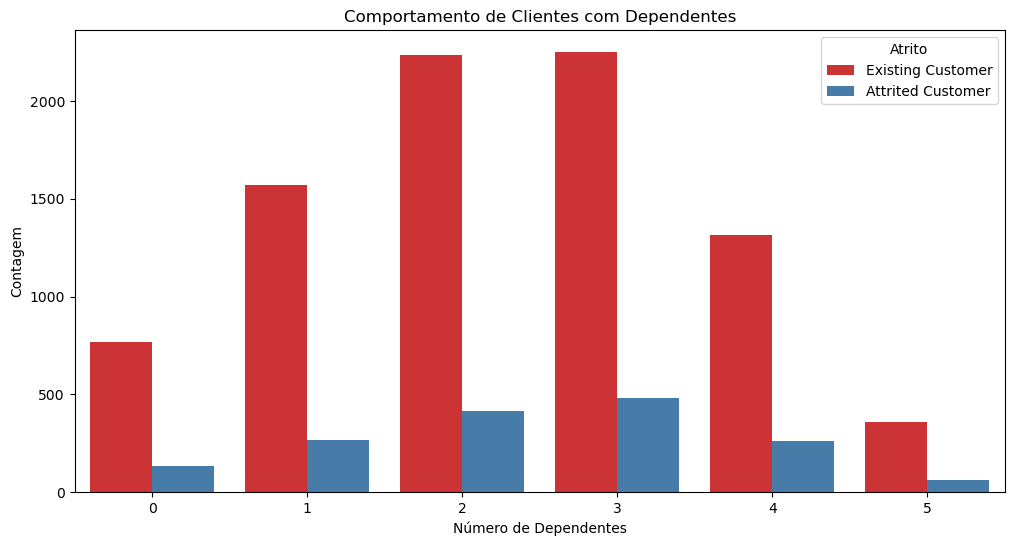

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependent_count', data=df, hue='Attrition_Flag', palette='Set1')
plt.title('Comportamento de Clientes com Dependentes')
plt.xlabel('Número de Dependentes')
plt.ylabel('Contagem')
plt.legend(title='Atrito')
plt.show()

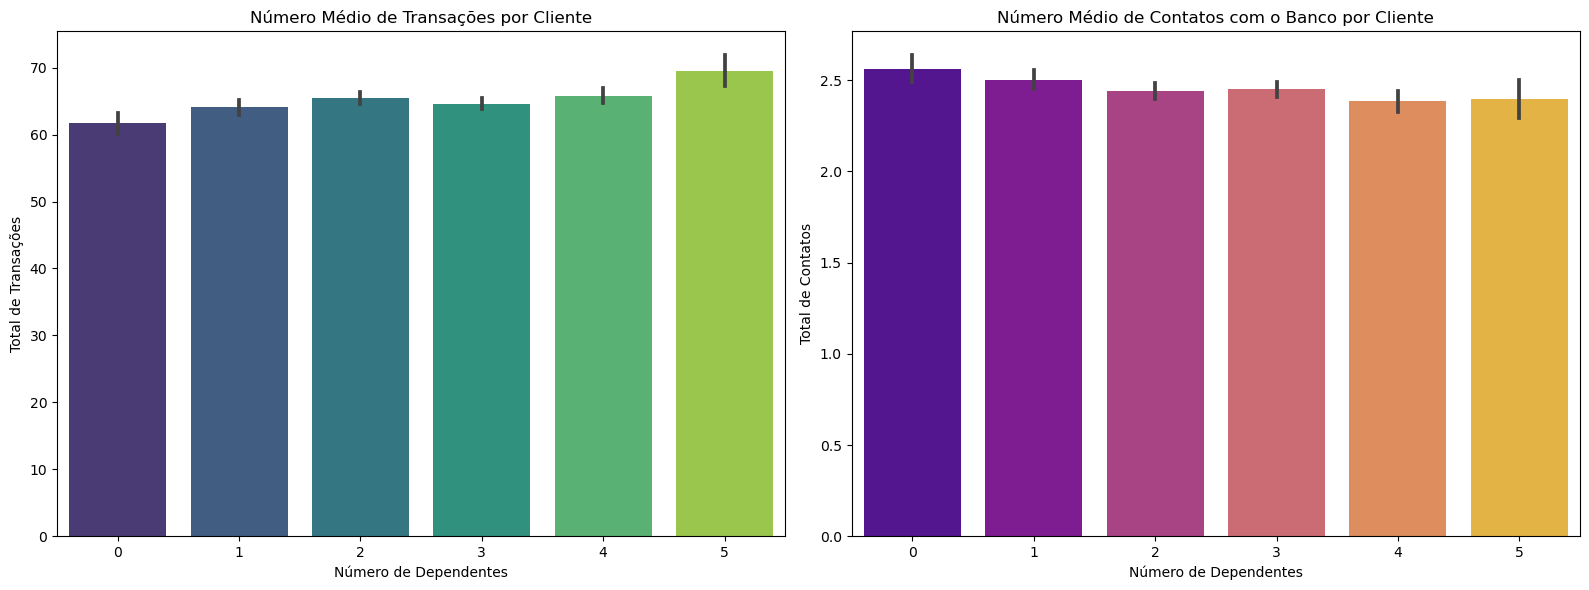

In [40]:
# clientes com dependentes têm comportamento financeiro diferente dos outros

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Número médio de transações
sns.barplot(x='Dependent_count', y='Total_Trans_Ct', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Número Médio de Transações por Cliente')
axes[0].set_xlabel('Número de Dependentes')
axes[0].set_ylabel('Total de Transações')

# Número médio de contatos com o banco
sns.barplot(x='Dependent_count', y='Contacts_Count_12_mon', data=df, palette='plasma', ax=axes[1])
axes[1].set_title('Número Médio de Contatos com o Banco por Cliente')
axes[1].set_xlabel('Número de Dependentes')
axes[1].set_ylabel('Total de Contatos')

plt.tight_layout()
plt.show()

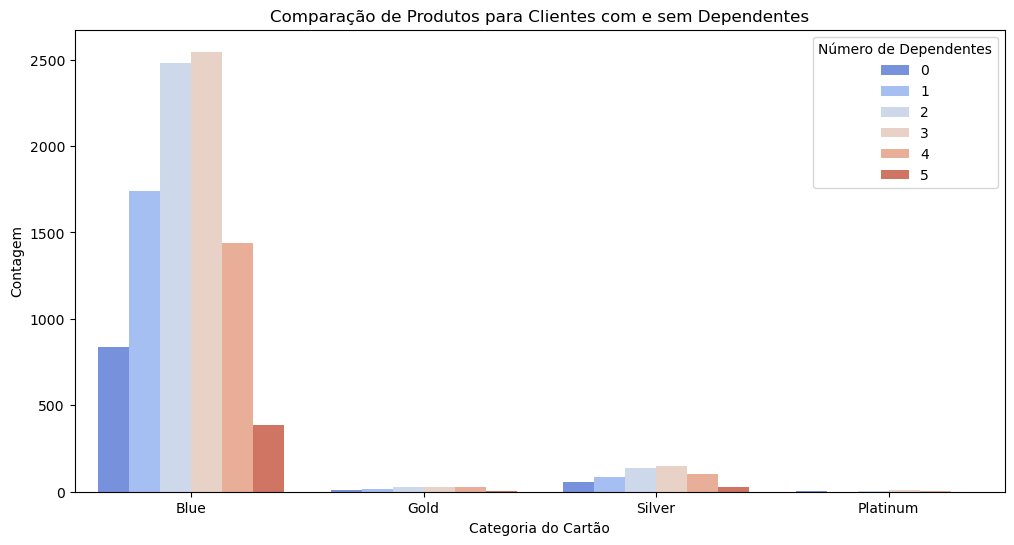

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Card_Category', data=df, hue='Dependent_count', palette='coolwarm')
plt.title('Comparação de Produtos para Clientes com e sem Dependentes')
plt.xlabel('Categoria do Cartão')
plt.ylabel('Contagem')
plt.legend(title='Número de Dependentes')
plt.show()

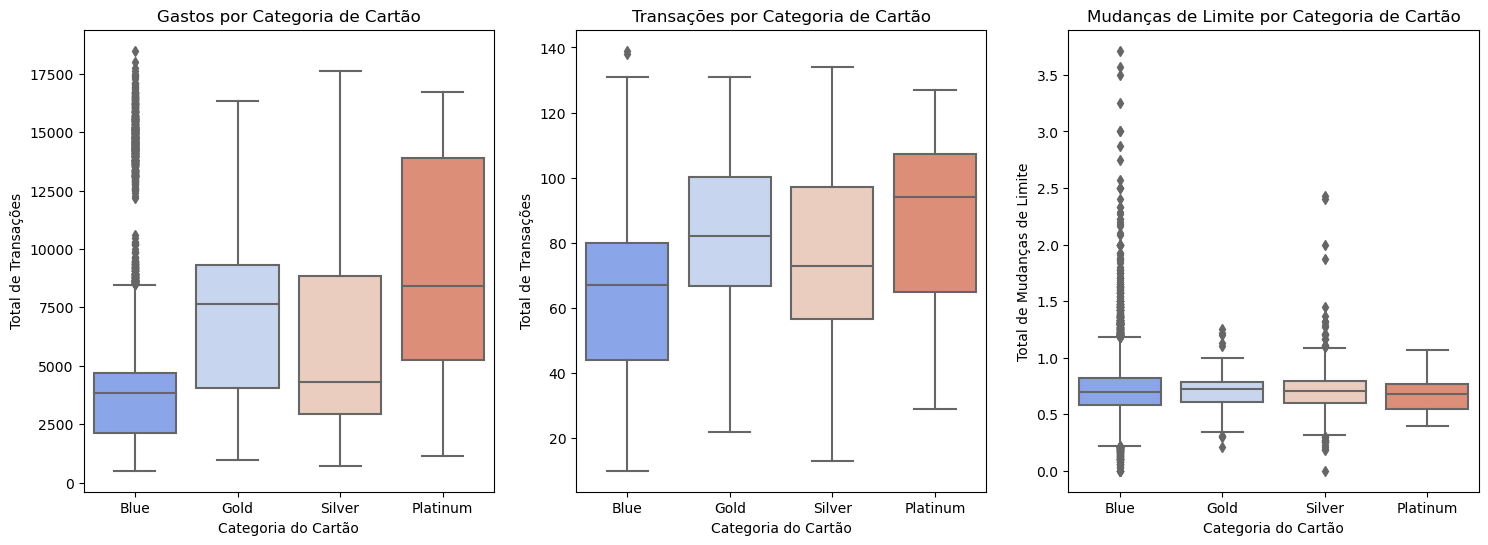

In [42]:
# comportamento de clientes em diferentes categorias de produtos (cartões Blue, Silver, Gold, Platinum)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Gastos por categoria de cartão
sns.boxplot(x='Card_Category', y='Total_Trans_Amt', data=df, palette='coolwarm', ax=axes[0])
axes[0].set_title('Gastos por Categoria de Cartão')
axes[0].set_xlabel('Categoria do Cartão')
axes[0].set_ylabel('Total de Transações')

# Transações por categoria de cartão
sns.boxplot(x='Card_Category', y='Total_Trans_Ct', data=df, palette='coolwarm', ax=axes[1])
axes[1].set_title('Transações por Categoria de Cartão')
axes[1].set_xlabel('Categoria do Cartão')
axes[1].set_ylabel('Total de Transações')

# Mudanças de limite por categoria de cartão
sns.boxplot(x='Card_Category', y='Total_Ct_Chng_Q4_Q1', data=df, palette='coolwarm', ax=axes[2])
axes[2].set_title('Mudanças de Limite por Categoria de Cartão')
axes[2].set_xlabel('Categoria do Cartão')
axes[2].set_ylabel('Total de Mudanças de Limite')
plt.show()

Acurácia (com XGBoost): 0.9644619940769991
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.94      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026

Matriz de Confusão:


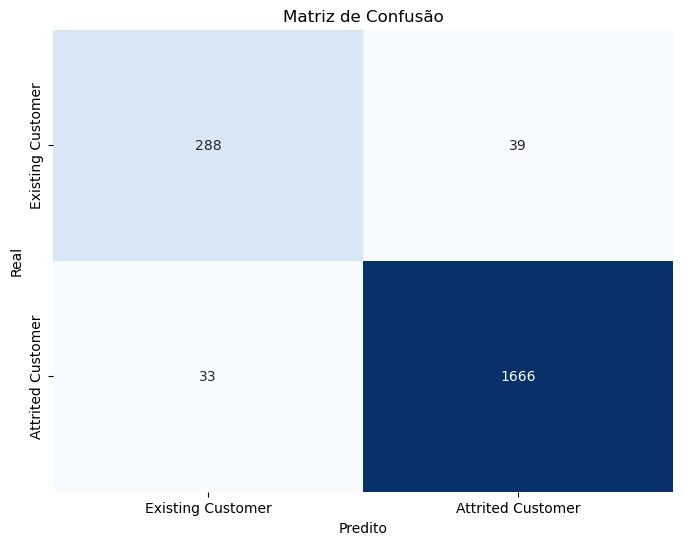

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

features = df.drop(['Attrition_Flag'], axis=1)
labels = df['Attrition_Flag']  

# Mapear classes para valores numéricos
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

#Separando colunas numéricas e categóricas
numeric_features = features.select_dtypes(include=['int64', 'float64'])
categorical_features = features.select_dtypes(include=['object'])

# Codificando variáveis categóricas
categorical_features_encoded = pd.get_dummies(categorical_features)

# Concatenando variáveis numéricas e categóricas codificadas
features_encoded = pd.concat([numeric_features, categorical_features_encoded], axis=1)

# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(features_encoded, labels_encoded, test_size=0.2, random_state=42)

# Treinamento do Modelo XGBoost
modelo_xgboost = XGBClassifier(objective='multi:softmax', num_class=len(df['Attrition_Flag'].unique()), random_state=42)
modelo_xgboost.fit(X_train, y_train)

# Avaliação do modelo XGBoost
y_pred_xgboost = modelo_xgboost.predict(X_test)
print("Acurácia (com XGBoost):", accuracy_score(y_test, y_pred_xgboost))
print(classification_report(y_test, y_pred_xgboost))

# Mapear classes preditas para as originais
y_pred_original = label_encoder.inverse_transform(y_pred_xgboost)
y_test_original = label_encoder.inverse_transform(y_test)

# Matriz de confusão
conf_matrix = confusion_matrix(y_test_original, y_pred_original)
print("Matriz de Confusão:")

# Criar um DataFrame a partir da matriz de confusão
confusion_df = pd.DataFrame(conf_matrix, index=df['Attrition_Flag'].unique(), columns=df['Attrition_Flag'].unique())

# Plotar a matriz de confusão usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

Acurácia (com XGBoost): 0.9629812438302073
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026



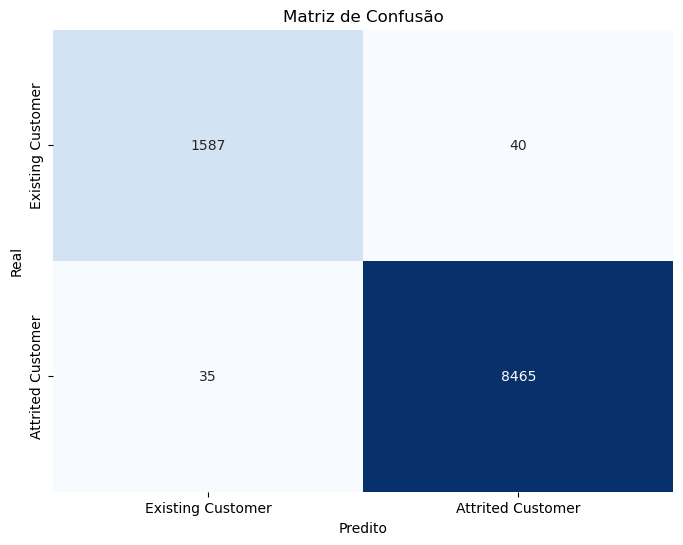

In [44]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_data(df):
    # Separar colunas numéricas e categóricas
    numeric_features = df.select_dtypes(include=['int64', 'float64'])
    categorical_features = df.select_dtypes(include=['object'])

    # Codificar variáveis categóricas
    categorical_features_encoded = pd.get_dummies(categorical_features)

    # Concatenar variáveis numéricas e categóricas codificadas
    features_encoded = pd.concat([numeric_features, categorical_features_encoded], axis=1)

    return features_encoded

def map_labels(labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    return labels_encoded, label_encoder

def train_evaluate_xgboost(features, labels):
    # Divisão do conjunto de dados
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Treinamento do Modelo XGBoost
    modelo_xgboost = XGBClassifier(objective='binary:logistic', random_state=42)
    modelo_xgboost.fit(X_train, y_train)

    # Avaliação do modelo XGBoost
    y_pred_xgboost = modelo_xgboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgboost)
    report = classification_report(y_test, y_pred_xgboost)

    return modelo_xgboost, accuracy, report

def plot_confusion_matrix(true_labels, predicted_labels, class_labels):
    # Matriz de confusão
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Criar um DataFrame a partir da matriz de confusão
    confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

    # Plotar a matriz de confusão usando seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

# Usar as funções
features_encoded = preprocess_data(df.drop(['Attrition_Flag'], axis=1))
labels, label_encoder = map_labels(df['Attrition_Flag'])

modelo_xgboost, accuracy, report = train_evaluate_xgboost(features_encoded, labels)

print("Acurácia (com XGBoost):", accuracy)
print(report)

# Mapear classes preditas para as originais
y_pred_original = label_encoder.inverse_transform(modelo_xgboost.predict(features_encoded))
y_test_original = label_encoder.inverse_transform(labels)

# Plotar a matriz de confusão
plot_confusion_matrix(y_test_original, y_pred_original, df['Attrition_Flag'].unique())


Acurácia (com XGBoost): 0.981764705882353
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1724
           1       0.98      0.98      0.98      1676

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



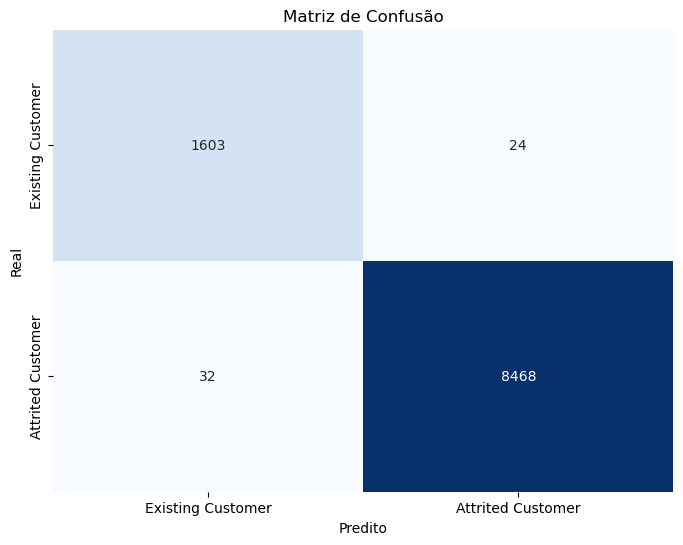

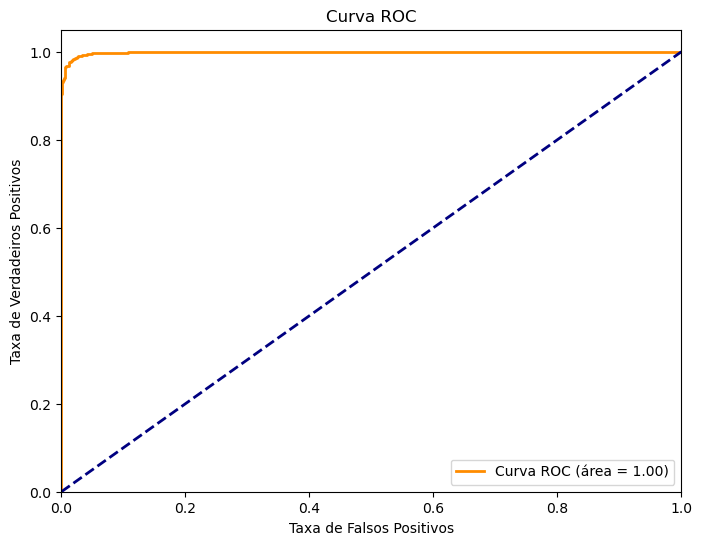

In [48]:
# A variavel target esta desbalanceada, vamos efetuar ajuste para verificar melhora precisao

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_data(df):
    # Separar colunas numéricas e categóricas
    numeric_features = df.select_dtypes(include=['int64', 'float64'])
    categorical_features = df.select_dtypes(include=['object'])

    # Codificar variáveis categóricas
    categorical_features_encoded = pd.get_dummies(categorical_features)

    # Concatenar variáveis numéricas e categóricas codificadas
    features_encoded = pd.concat([numeric_features, categorical_features_encoded], axis=1)

    return features_encoded

def map_labels(labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    return labels_encoded, label_encoder

def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

def train_evaluate_xgboost(features, labels):
    # Aplicar SMOTE para balanceamento
    features_resampled, labels_resampled = apply_smote(features, labels)

    # Divisão do conjunto de dados
    X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

    # Treinamento do Modelo XGBoost
    modelo_xgboost = XGBClassifier(objective='binary:logistic', random_state=42)
    modelo_xgboost.fit(X_train, y_train)

    # Avaliação do modelo XGBoost
    y_pred_xgboost = modelo_xgboost.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_xgboost)
    report = classification_report(y_test, y_pred_xgboost)

    return modelo_xgboost, accuracy, report, X_test, y_test

def plot_confusion_matrix(true_labels, predicted_labels, class_labels):
    # Matriz de confusão
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Criar um DataFrame a partir da matriz de confusão
    confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

    # Plotar a matriz de confusão usando seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    # Calcular probabilidades para a curva ROC
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Usar as funções
features_encoded = preprocess_data(df.drop(['Attrition_Flag'], axis=1))
labels, label_encoder = map_labels(df['Attrition_Flag'])

modelo_xgboost, accuracy, report, X_test, y_test = train_evaluate_xgboost(features_encoded, labels)

print("Acurácia (com XGBoost):", accuracy)
print(report)

# Mapear classes preditas para as originais
y_pred_original = label_encoder.inverse_transform(modelo_xgboost.predict(features_encoded))
y_test_original = label_encoder.inverse_transform(labels)

# Plotar a matriz de confusão
plot_confusion_matrix(y_test_original, y_pred_original, df['Attrition_Flag'].unique())

# Plotar a curva ROC
plot_roc_curve(modelo_xgboost, X_test, y_test)


Training and evaluating Logistic Regression...
Accuracy: 0.6906
Report:
              precision    recall  f1-score   support

           0       0.67      0.77      0.71      1724
           1       0.72      0.61      0.66      1676

    accuracy                           0.69      3400
   macro avg       0.69      0.69      0.69      3400
weighted avg       0.69      0.69      0.69      3400

Training and evaluating Random Forest...
Accuracy: 0.9718
Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1724
           1       0.97      0.97      0.97      1676

    accuracy                           0.97      3400
   macro avg       0.97      0.97      0.97      3400
weighted avg       0.97      0.97      0.97      3400

Training and evaluating Gradient Boosting...
Accuracy: 0.9629
Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1724
           1       0.96      

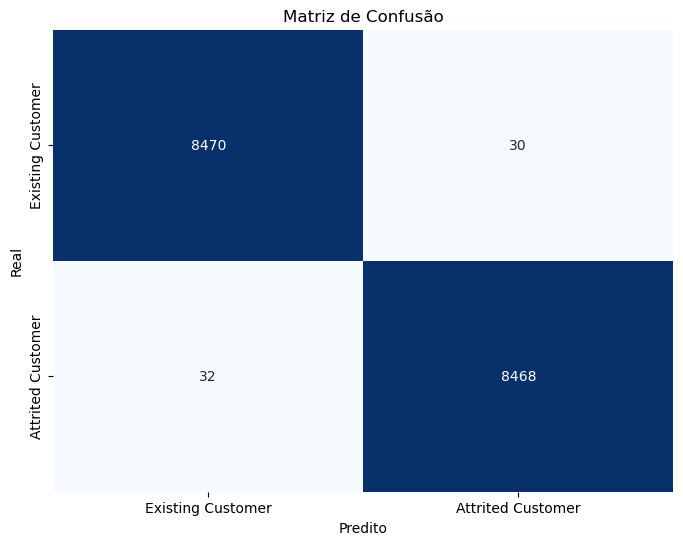

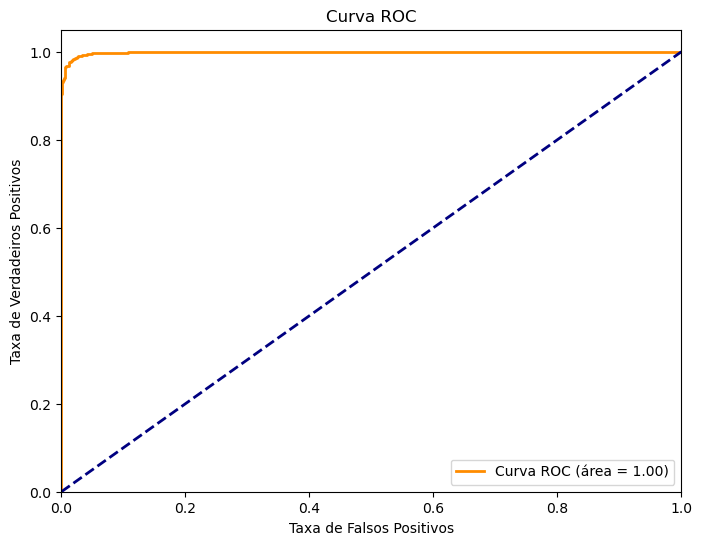

In [49]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def preprocess_data(df):
    # Separar colunas numéricas e categóricas
    numeric_features = df.select_dtypes(include=['int64', 'float64'])
    categorical_features = df.select_dtypes(include=['object'])

    # Codificar variáveis categóricas
    categorical_features_encoded = pd.get_dummies(categorical_features)

    # Concatenar variáveis numéricas e categóricas codificadas
    features_encoded = pd.concat([numeric_features, categorical_features_encoded], axis=1)

    return features_encoded

def map_labels(labels):
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)
    return labels_encoded, label_encoder

def apply_smote(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Treinamento do modelo
    model.fit(X_train, y_train)

    # Avaliação do modelo
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    return model, accuracy, report

def plot_confusion_matrix(true_labels, predicted_labels, class_labels):
    # Matriz de confusão
    conf_matrix = confusion_matrix(true_labels, predicted_labels)

    # Criar um DataFrame a partir da matriz de confusão
    confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

    # Plotar a matriz de confusão usando seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriz de Confusão')
    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    # Calcular probabilidades para a curva ROC
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcular a curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (área = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show()

# Usar as funções
features_encoded = preprocess_data(df.drop(['Attrition_Flag'], axis=1))
labels, label_encoder = map_labels(df['Attrition_Flag'])

# Aplicar SMOTE para balanceamento
features_resampled, labels_resampled = apply_smote(features_encoded, labels)

# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(features_resampled, labels_resampled, test_size=0.2, random_state=42)

# Definir modelos para o grid search
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier()
}

# Grid search para encontrar o melhor modelo
best_model = None
best_accuracy = 0
best_report = None

for model_name, model in models.items():
    print(f'Training and evaluating {model_name}...')
    _, accuracy, report = train_evaluate_model(model, X_train, y_train, X_test, y_test)

    print(f'Accuracy: {accuracy:.4f}')
    print(f'Report:\n{report}')

    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy
        best_report = report

# Mapear classes preditas para as originais
y_pred_original = label_encoder.inverse_transform(best_model.predict(features_resampled))
y_test_original = label_encoder.inverse_transform(labels_resampled)

# Plotar a matriz de confusão
plot_confusion_matrix(y_test_original, y_pred_original, df['Attrition_Flag'].unique())

# Plotar a curva ROC para o melhor modelo
plot_roc_curve(best_model, X_test, y_test)
